In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [18]:
! cp /content/drive/MyDrive/kaggle_api/kaggle.json ~/.kaggle/

In [19]:
! chmod 600 ~/.kaggle/kaggle.json

In [20]:
!kaggle datasets download -d zaurbegiev/my-dataset

 86% 7.00M/8.14M [00:00<00:00, 13.4MB/s]
100% 8.14M/8.14M [00:00<00:00, 9.59MB/s]


In [21]:
!unzip /content/my-dataset.zip

Archive:  /content/my-dataset.zip
  inflating: credit_test.csv         
  inflating: credit_train.csv        


In [22]:
import pandas as pd
import numpy as np

In [51]:
train=pd.read_csv('credit_train.csv')
test=pd.read_csv('credit_test.csv')

In [24]:
train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
train.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
train=train.drop(columns=['Loan ID','Customer ID'])

In [ ]:
train.loc[100513,['Loan Status']].isna()[0]

True

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='Loan Status'>

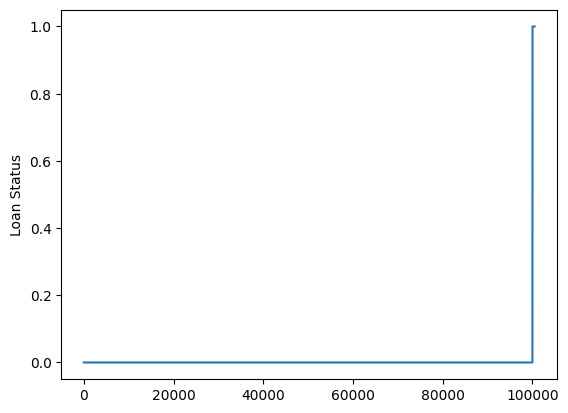

In [ ]:
sns.lineplot(train['Loan Status'].isnull())

In [ ]:
columns=train.columns
columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [ ]:
train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   100000 non-null  object 
 1   Current Loan Amount           100000 non-null  float64
 2   Term                          100000 non-null  object 
 3   Credit Score                  80846 non-null   float64
 4   Annual Income                 80846 non-null   float64
 5   Years in current job          95778 non-null   object 
 6   Home Ownership                100000 non-null  object 
 7   Purpose                       100000 non-null  object 
 8   Monthly Debt                  100000 non-null  float64
 9   Years of Credit History       100000 non-null  float64
 10  Months since last delinquent  46859 non-null   float64
 11  Number of Open Accounts       100000 non-null  float64
 12  Number of Credit Problems     100000 non-nul

In [ ]:
train.isnull().sum()

Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [ ]:
train.tail(10)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
train.drop(columns=['Months since last delinquent'],inplace=True)
train.drop(train[train['Loan Status'].isnull()].index,axis=0,inplace=True)

In [ ]:
train.isnull().sum()

Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19154
Annual Income                19154
Years in current job          4222
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              2
Bankruptcies                   204
Tax Liens                       10
dtype: int64

In [28]:
def year_extraction(x):
  if x!=None:
    ans=''
    try:
      for i in x:
        if i.isdigit():
          ans+=i
      return int(ans)
    except:
      return np.nan

In [29]:
train['Years in current job']=train['Years in current job'].apply(year_extraction)
train.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5.0,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [53]:
train=train.dropna()

In [ ]:
train.duplicated().sum()

9781

In [31]:
train=train.drop_duplicates()

In [ ]:
train.shape

(67490, 16)

In [ ]:
train.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,Charged Off,206602.0,Short Term,7290.0,896857.0,10.0,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,Fully Paid,217646.0,Short Term,730.0,1184194.0,1.0,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0


In [ ]:
train['Bankruptcies'].value_counts()

0.0    60421
1.0     6721
2.0      261
3.0       65
4.0       16
5.0        4
7.0        1
6.0        1
Name: Bankruptcies, dtype: int64

EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,Charged Off,206602.0,Short Term,7290.0,896857.0,10.0,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,Fully Paid,217646.0,Short Term,730.0,1184194.0,1.0,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0


<Axes: xlabel='Loan Status', ylabel='count'>

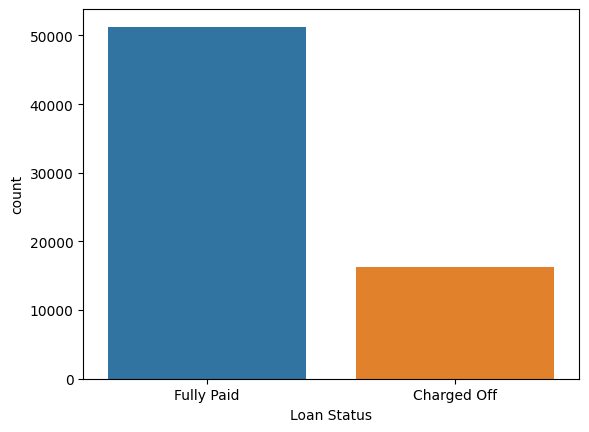

In [ ]:
sns.countplot(x=train['Loan Status'])

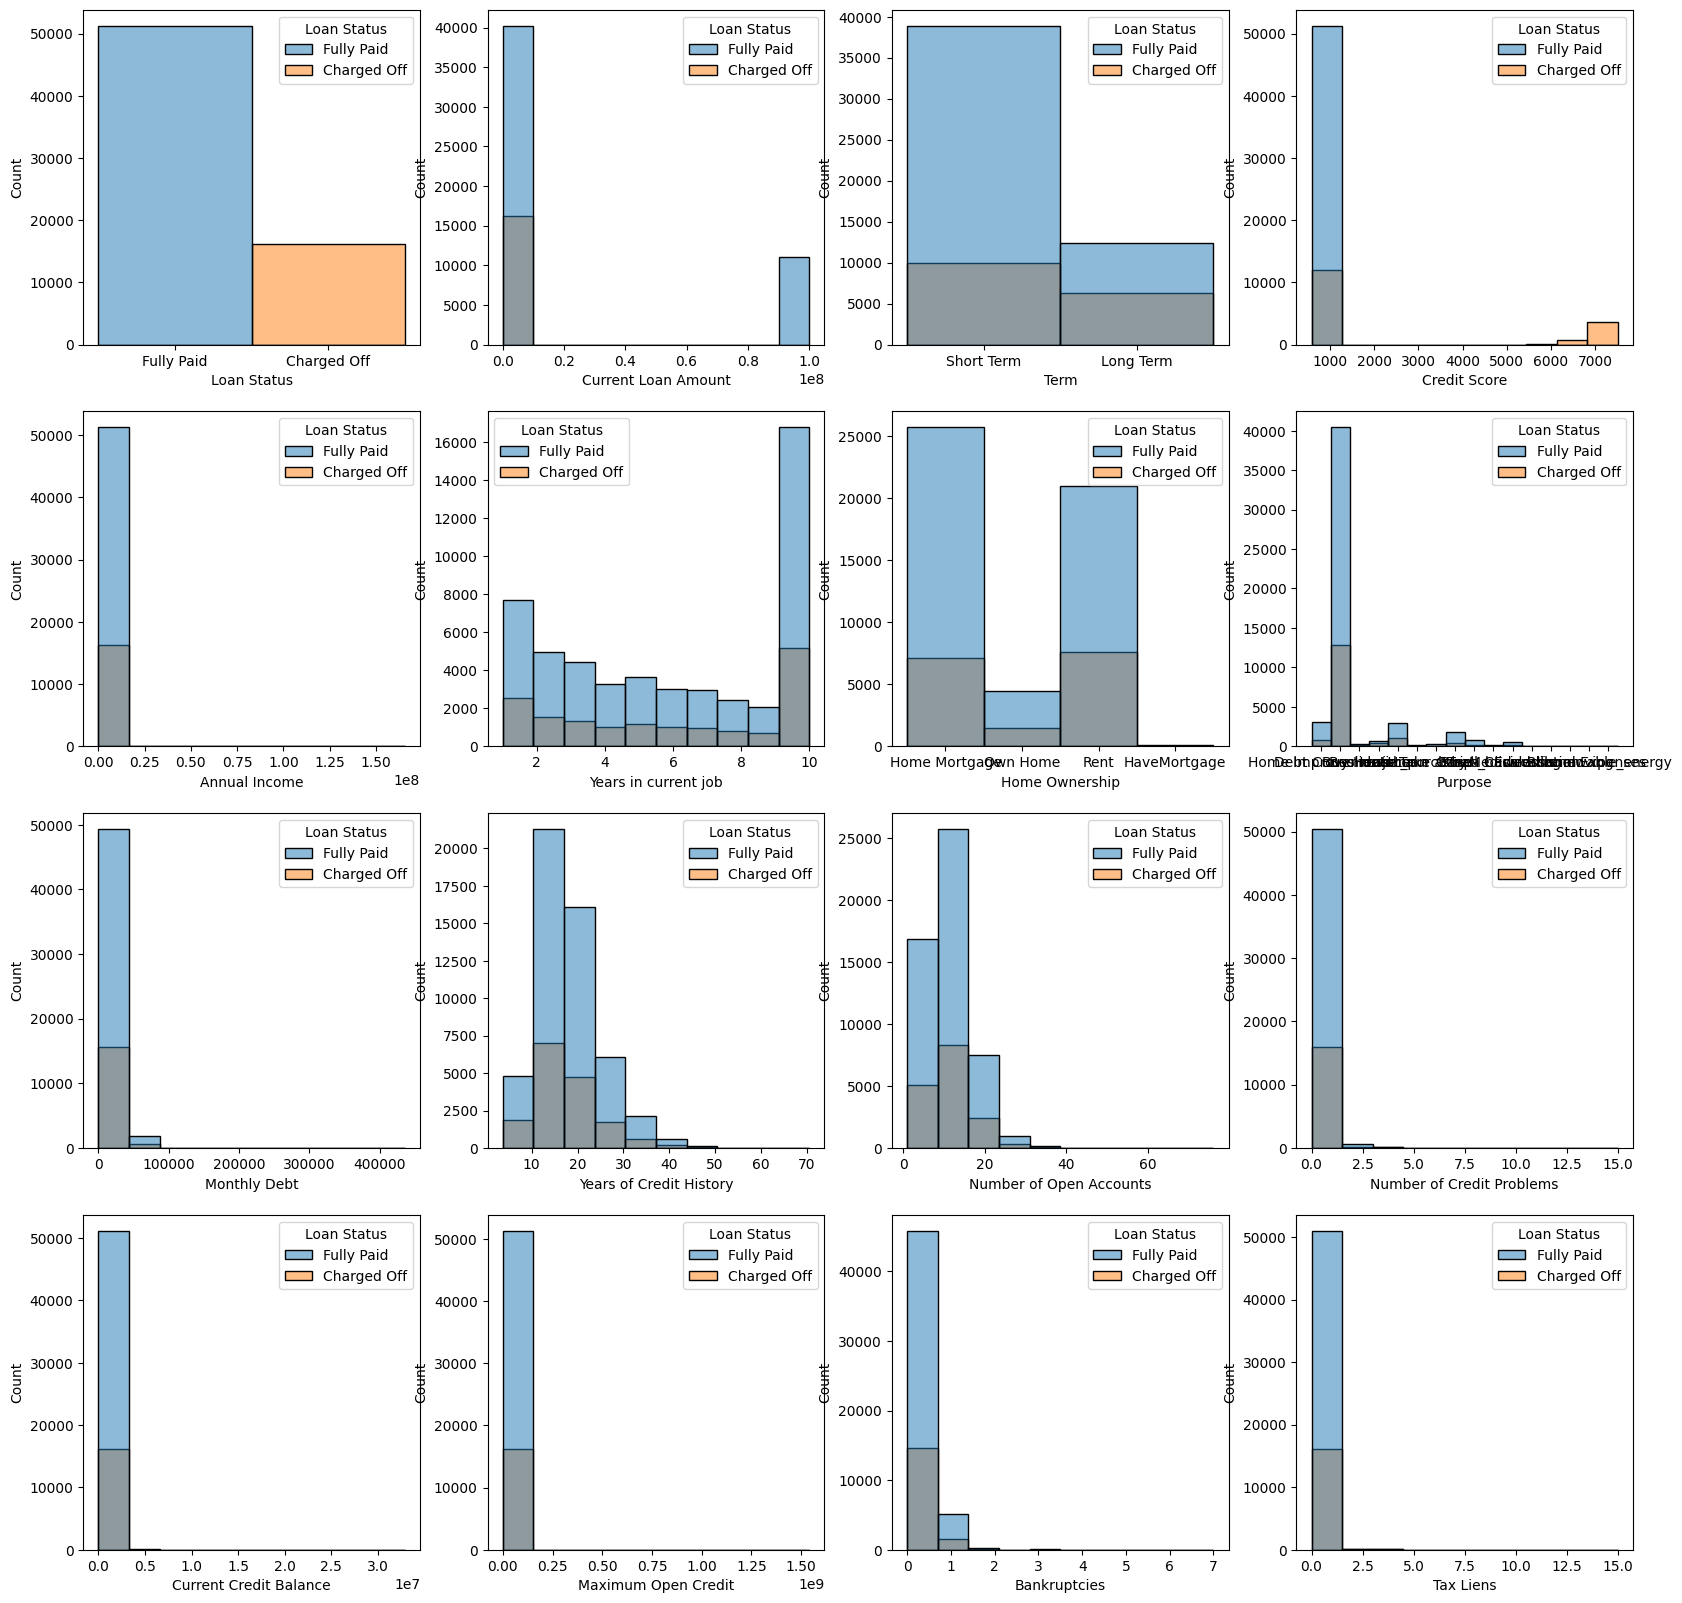

In [ ]:
fig,axes=plt.subplots(4,4,figsize=(20,20))
for j,i in enumerate(train.columns):
  sns.histplot(data=train,x=i,hue='Loan Status',bins=10,ax=axes[j//4,j%4])

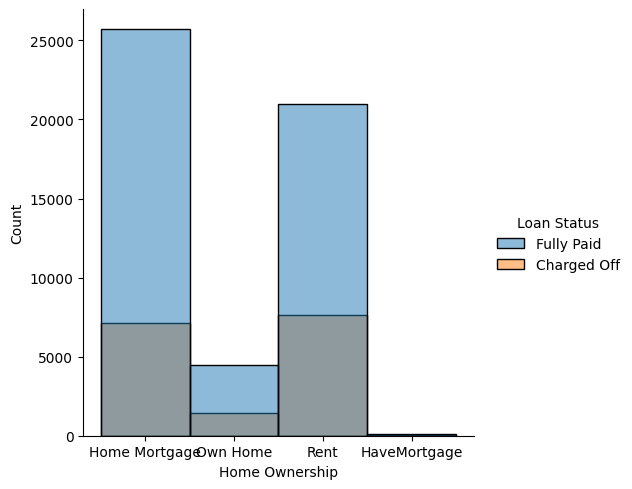

In [ ]:
sns.displot(data=train,x='Home Ownership',hue='Loan Status')

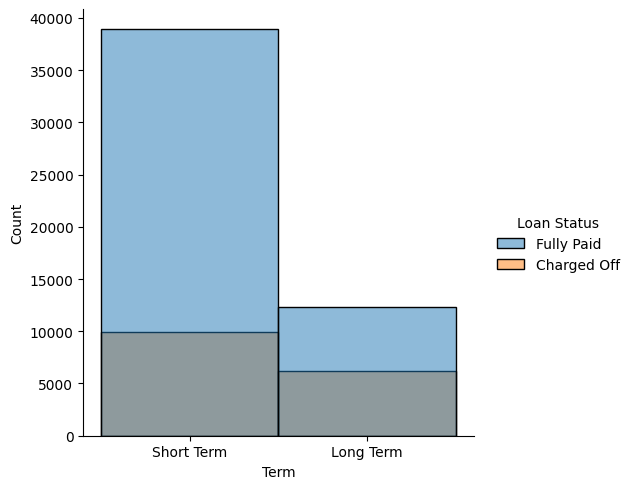

In [ ]:
sns.displot(data=train,x='Term',hue='Loan Status')

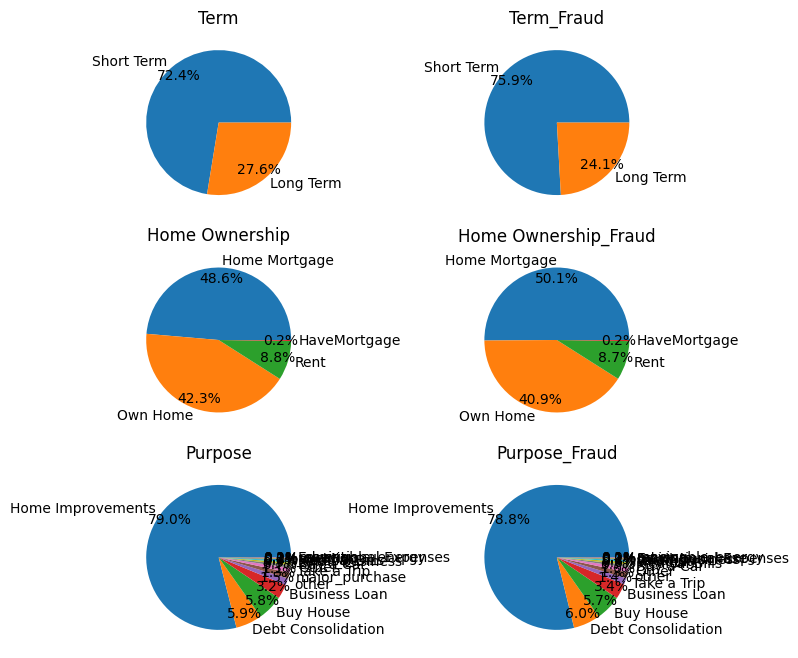

In [ ]:
fig,ax=plt.subplots(3,2,figsize=(8,8))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
for j,i in enumerate(['Term','Home Ownership','Purpose']):
  ax[j,0].pie(train[i].value_counts(),labels=train[i].unique(),autopct='%1.1f%%', pctdistance=0.85)

  fig=plt.gcf()
  fig.gca().add_artist(centre_circle)
  ax[j,0].set_title(i)

  ax[j,1].pie(train[train['Loan Status']=='Fully Paid'][i].value_counts(),labels=train[train['Loan Status']=='Fully Paid'][i].unique(),autopct='%1.1f%%', pctdistance=0.85,
        )
  ax[j,1].set_title(i+'_Fraud')
plt.show()


In [ ]:
train.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

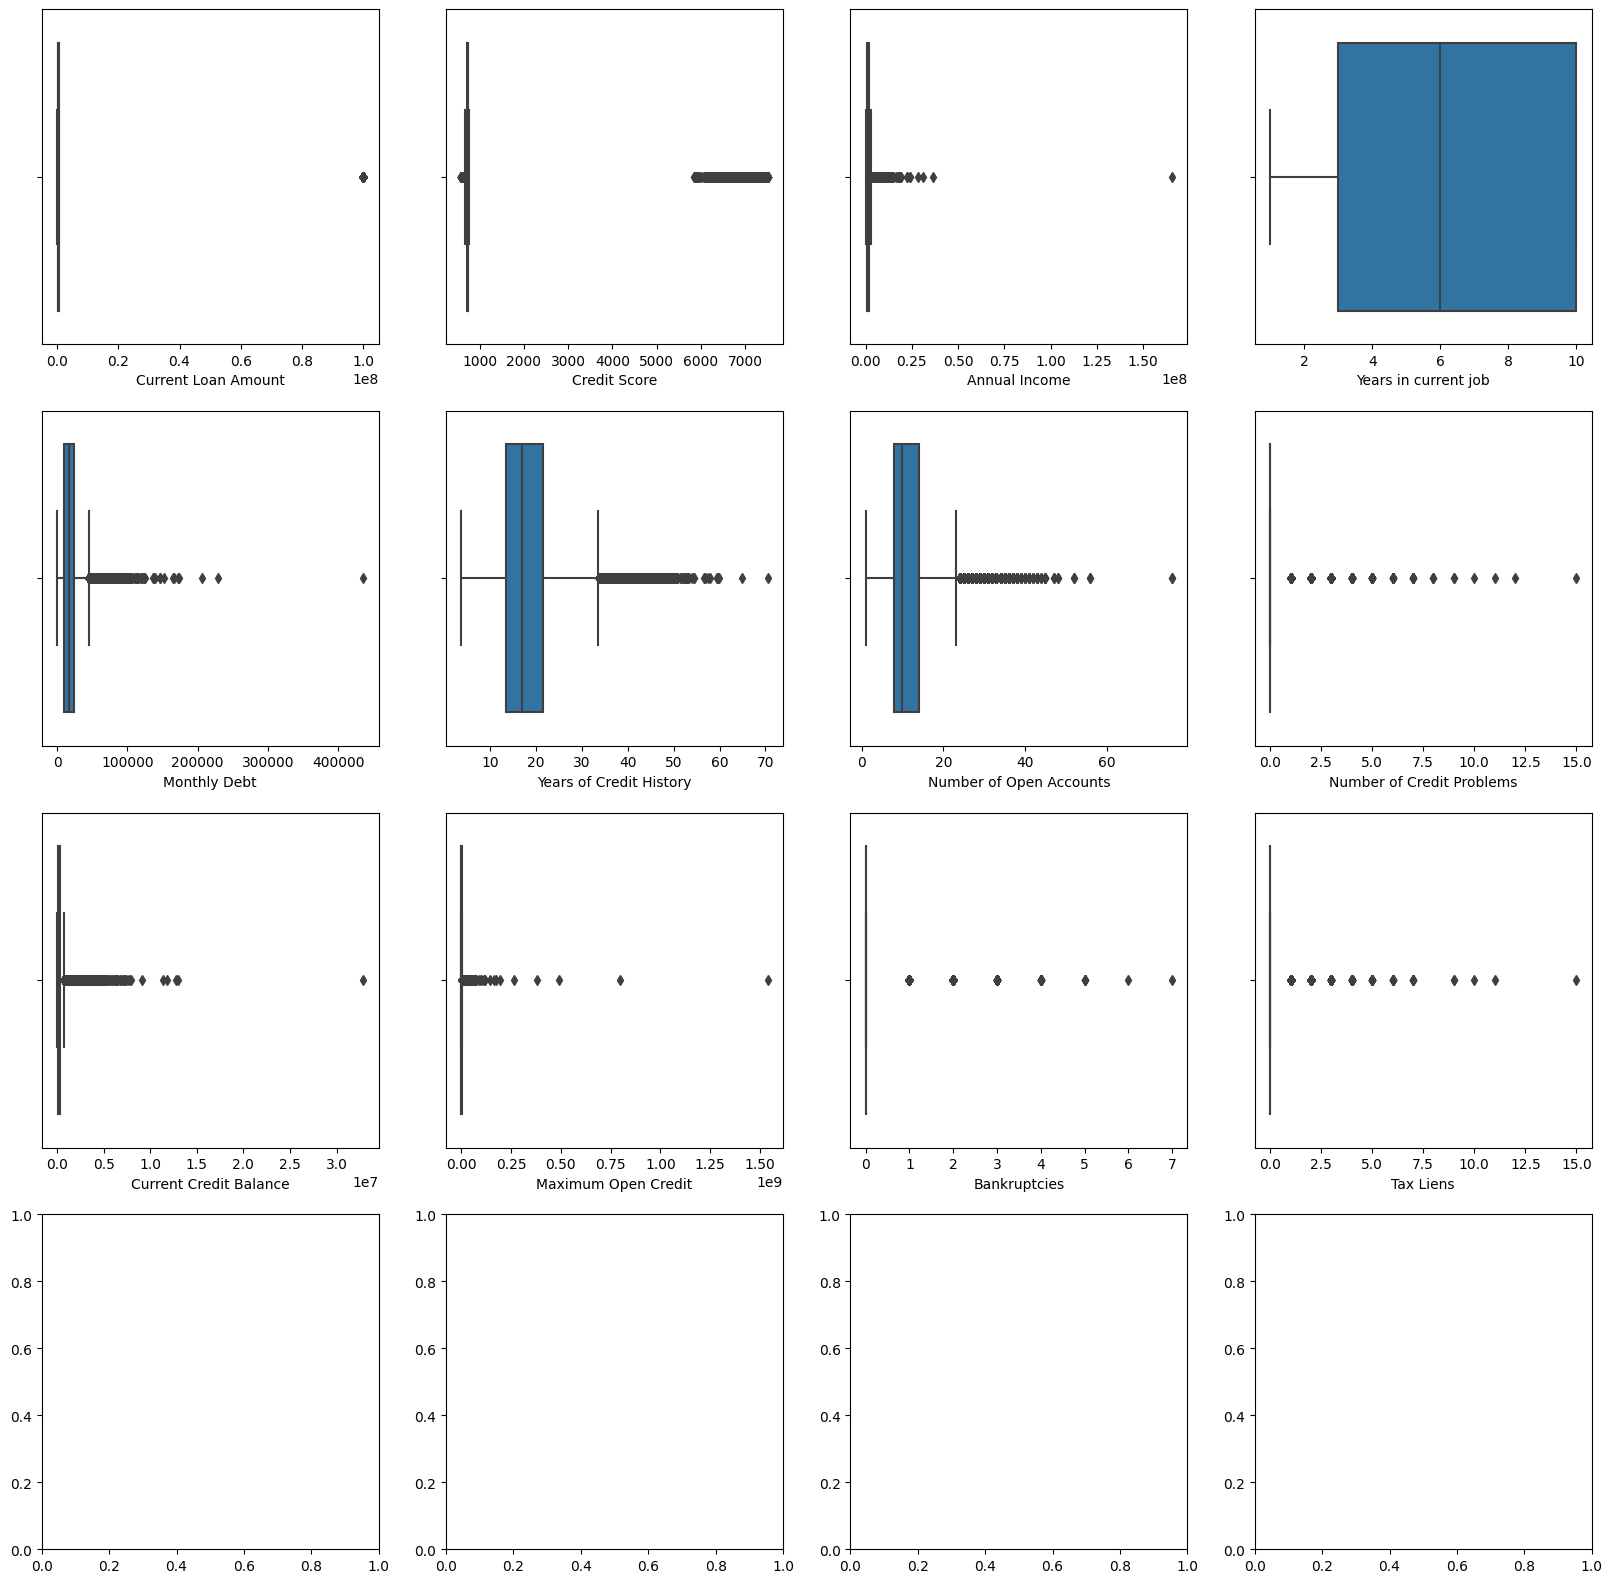

In [ ]:
fig,axes=plt.subplots(4,4,figsize=(20,20))
for j,i in enumerate(['Current Loan Amount','Credit Score','Annual Income', 'Years in current job','Monthly Debt', 'Years of Credit History', 'Number of Open Accounts','Number of Credit Problems', 'Current Credit Balance','Maximum Open Credit', 'Bankruptcies', 'Tax Liens']):
  sns.boxplot(data=train,x=i,ax=axes[j//4,j%4])
plt.show()

In [55]:
train.loc[:,['Loan Status','Term','Home Ownership','Purpose']].head()

,Loan Status,Term,Home Ownership,Purpose
0,Fully Paid,Short Term,Home Mortgage,Home Improvements
2,Fully Paid,Short Term,Own Home,Debt Consolidation
3,Fully Paid,Long Term,Own Home,Debt Consolidation
5,Charged Off,Short Term,Home Mortgage,Debt Consolidation
6,Fully Paid,Short Term,Home Mortgage,Debt Consolidation


In [59]:
pd.get_dummies(train[['Loan Status','Term','Home Ownership','Purpose']]).head()

,Loan Status_Charged Off,Loan Status_Fully Paid,Term_Long Term,Term_Short Term,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
a=pd.get_dummies(train['Loan Status'])
train['Loan Status']=a[['Fully Paid']]
train.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,1,99999999.0,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,0,206602.0,Short Term,7290.0,896857.0,10.0,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,1,217646.0,Short Term,730.0,1184194.0,1.0,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0


In [33]:
a=pd.get_dummies(train['Term'])
train['Term']=a[['Short Term']]
train.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,1,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,1,99999999.0,1,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,0,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,0,206602.0,1,7290.0,896857.0,10.0,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,1,217646.0,1,730.0,1184194.0,1.0,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0


<ipython-input-45-1df3d0bfd6af>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr())


<Axes: >

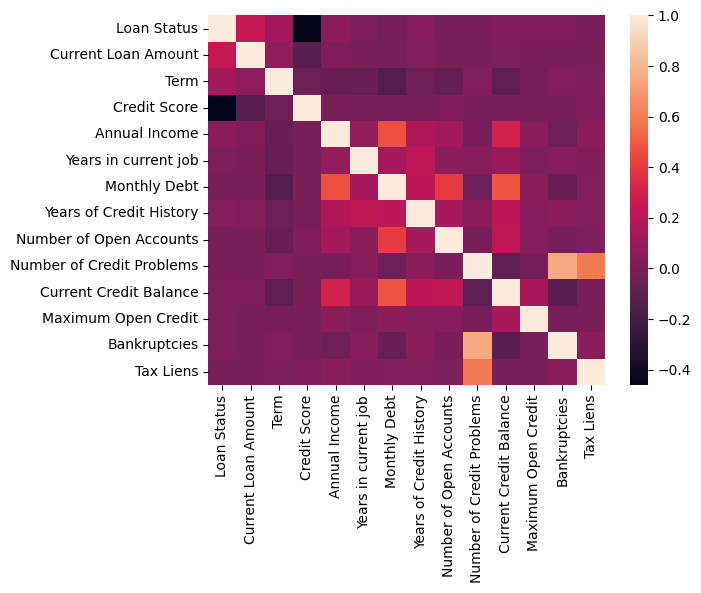

In [ ]:
sns.heatmap(train.corr())

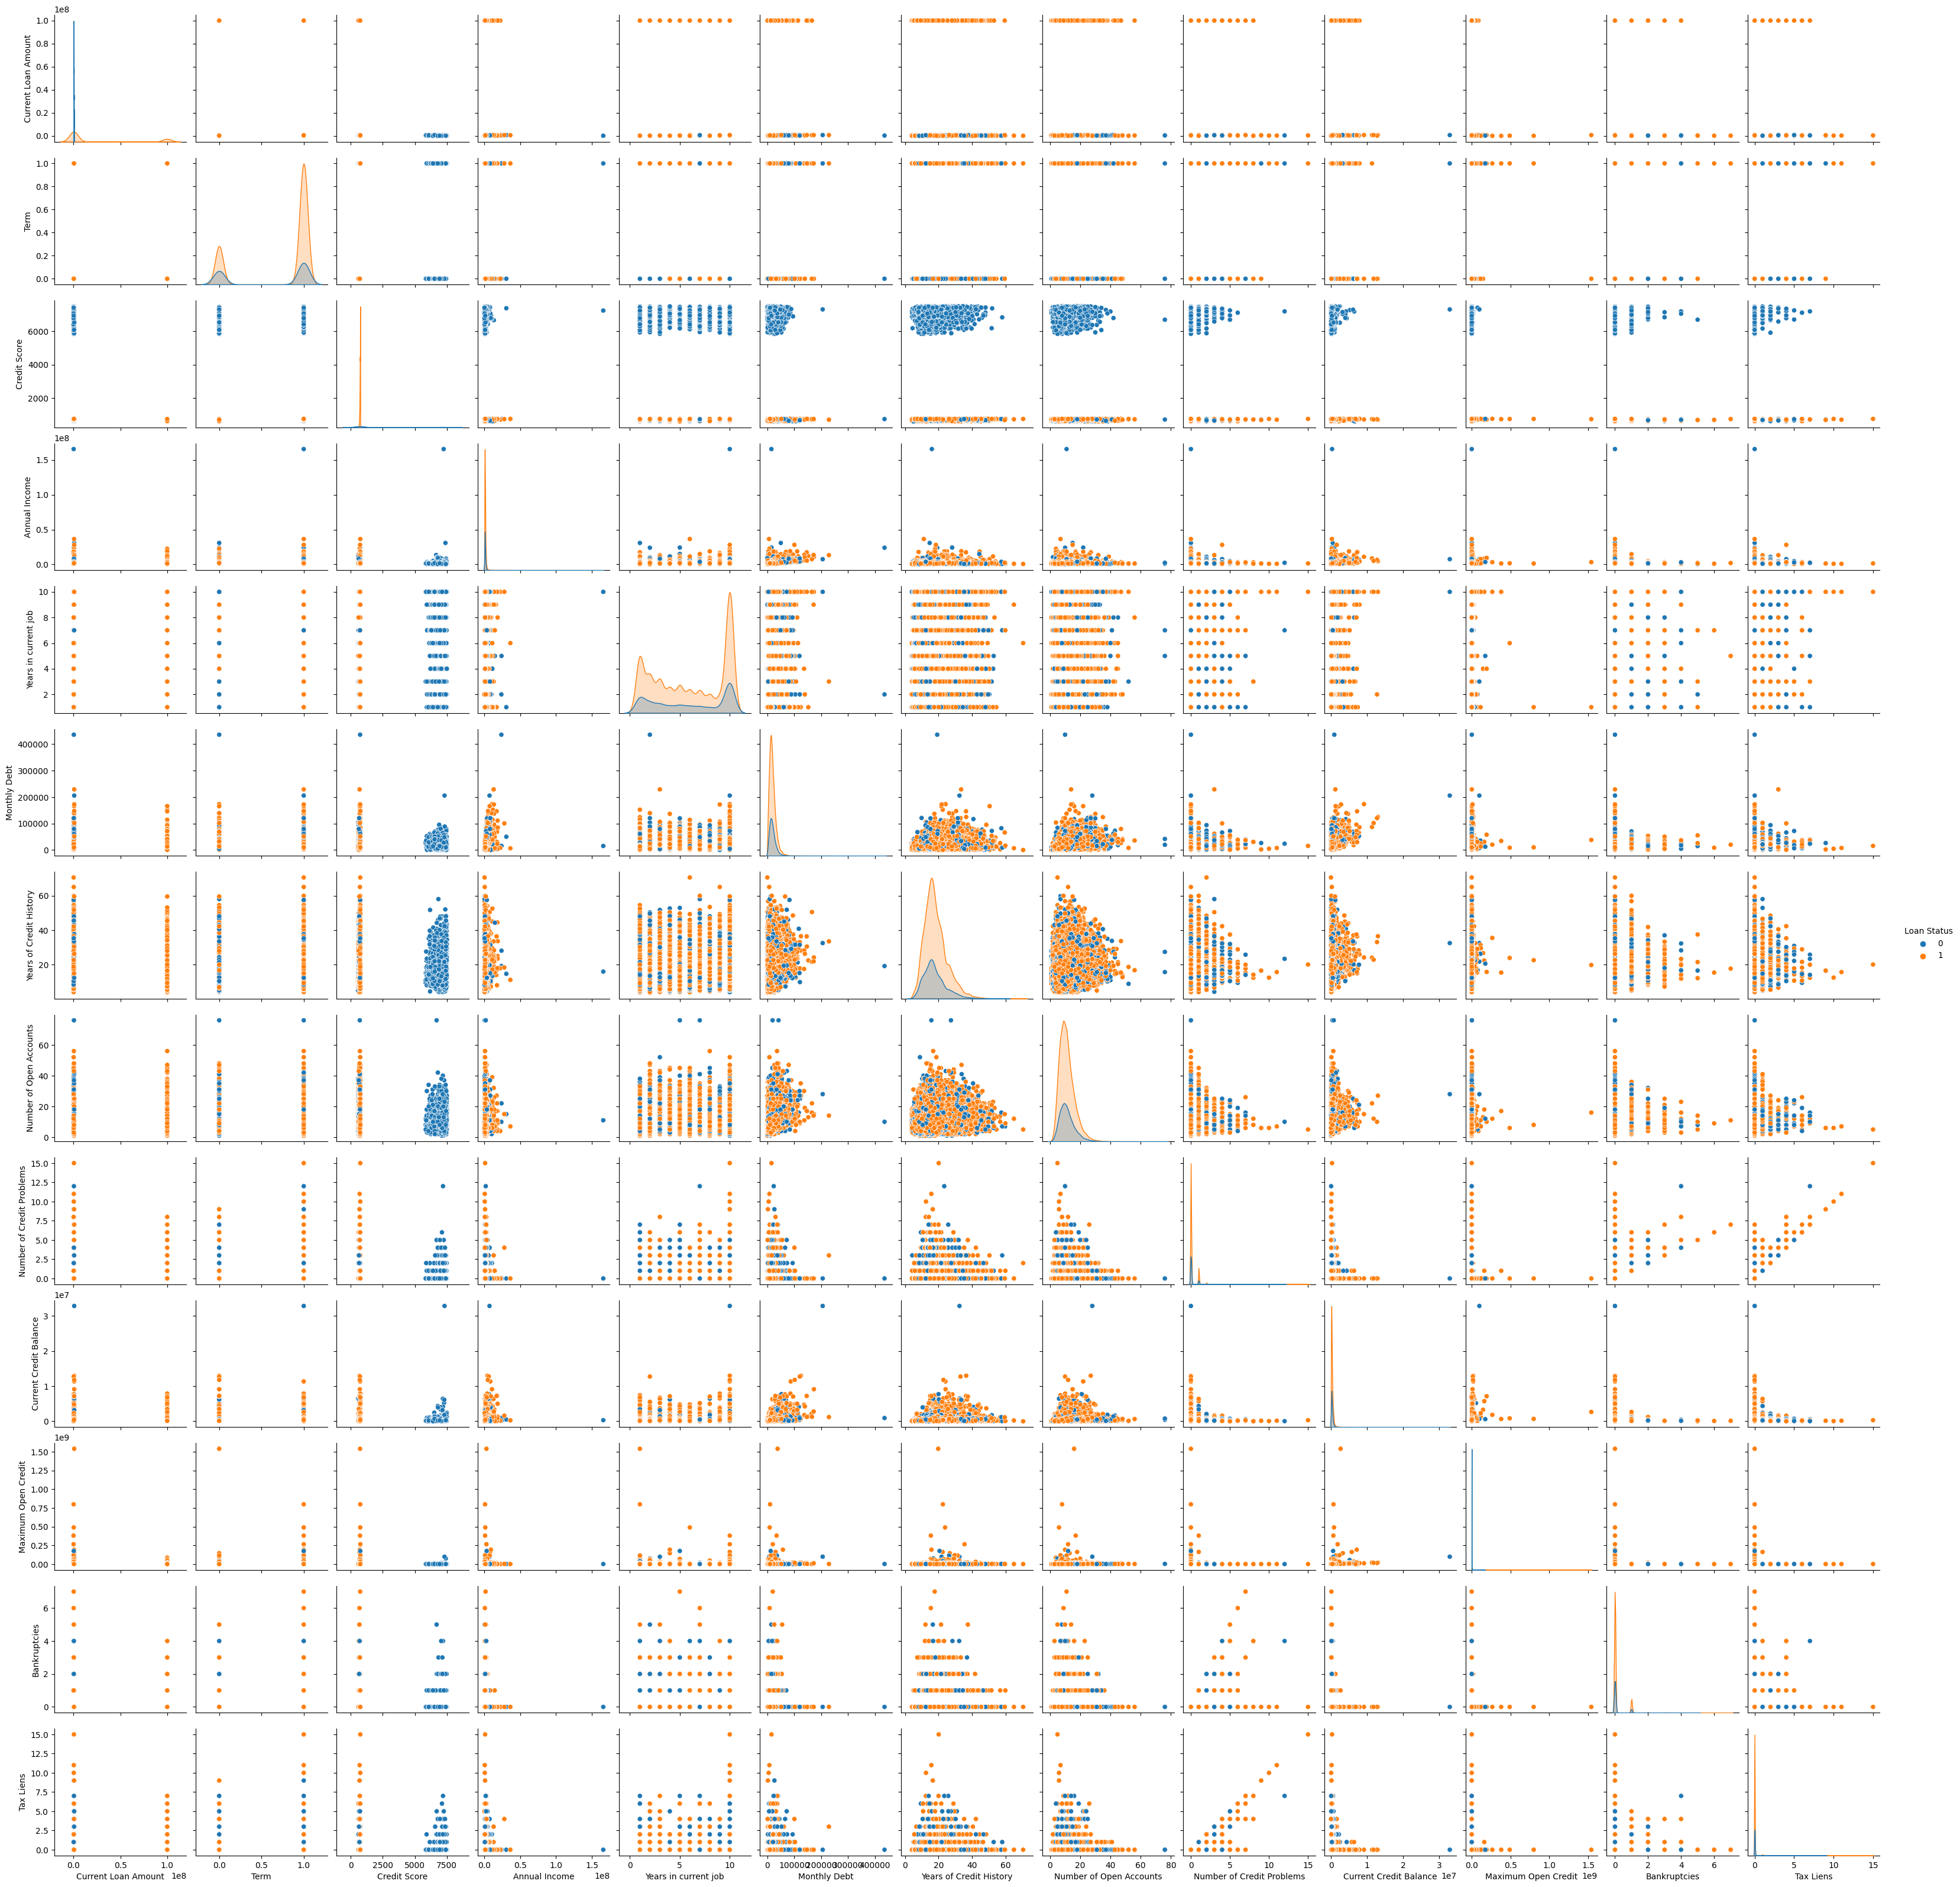

In [ ]:
sns.pairplot(data=train, hue="Loan Status")

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder()
  
# # Passing encoded columns
  
# enc_data = pd.DataFrame(enc.fit_transform(
#     train[['Loan Status','Term','Home Ownership','Purpose']]).toarray())
# enc_data

In [34]:
c=pd.get_dummies(train['Home Ownership']).iloc[:,1:]
d=pd.get_dummies(train['Purpose'])

f=c.join(d)
f

,Home Mortgage,Own Home,Rent,Business Loan,Buy House,Buy a Car,Debt Consolidation,Educational Expenses,Home Improvements,Medical Bills,Other,Take a Trip,major_purchase,moving,other,renewable_energy,small_business,vacation,wedding
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
99994,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
99996,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
99997,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# a=pd.get_dummies(test['Loan Status'])
b=pd.get_dummies(test['Term']).iloc[:,1:]
c=pd.get_dummies(test['Home Ownership']).iloc[:,1:]
d=pd.get_dummies(test['Purpose']).iloc[:,1:]

f2=b.join([c,d])
f2

,Short Term,Home Mortgage,Own Home,Rent,Buy House,Buy a Car,Debt Consolidation,Educational Expenses,Home Improvements,Medical Bills,Other,Take a Trip,major_purchase,moving,other,renewable_energy,small_business,vacation,wedding
0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10351,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
train=train.join(f)
train.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,...,Medical Bills,Other,Take a Trip,major_purchase,moving,other,renewable_energy,small_business,vacation,wedding
0,1,445412.0,1,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,...,0,0,0,0,0,0,0,0,0,0
2,1,99999999.0,1,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,...,0,0,0,0,0,0,0,0,0,0
3,1,347666.0,0,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,...,0,0,0,0,0,0,0,0,0,0
5,0,206602.0,1,7290.0,896857.0,10.0,Home Mortgage,Debt Consolidation,16367.74,17.3,...,0,0,0,0,0,0,0,0,0,0
6,1,217646.0,1,730.0,1184194.0,1.0,Home Mortgage,Debt Consolidation,10855.08,19.6,...,0,0,0,0,0,0,0,0,0,0


In [36]:
train=train.drop(columns=['Home Ownership','Purpose'])

In [ ]:
train

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,...,Medical Bills,Other,Take a Trip,major_purchase,moving,other,renewable_energy,small_business,vacation,wedding
0,1,445412.0,1,709.0,1167493.0,8.0,5214.74,17.2,6.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1,99999999.0,1,741.0,2231892.0,8.0,29200.53,14.9,18.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1,347666.0,0,721.0,806949.0,3.0,8741.90,12.0,9.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,0,206602.0,1,7290.0,896857.0,10.0,16367.74,17.3,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,1,217646.0,1,730.0,1184194.0,1.0,10855.08,19.6,13.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,1,99999999.0,1,742.0,1190046.0,1.0,11969.81,20.1,9.0,0.0,...,0,0,0,0,0,1,0,0,0,0
99994,1,210584.0,1,719.0,783389.0,1.0,3727.61,17.4,6.0,0.0,...,0,1,0,0,0,0,0,0,0,0
99996,1,99999999.0,1,732.0,1289416.0,1.0,13109.05,9.4,22.0,0.0,...,0,0,0,0,0,0,0,0,0,0
99997,1,103136.0,1,742.0,1150545.0,6.0,7315.57,18.8,12.0,1.0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

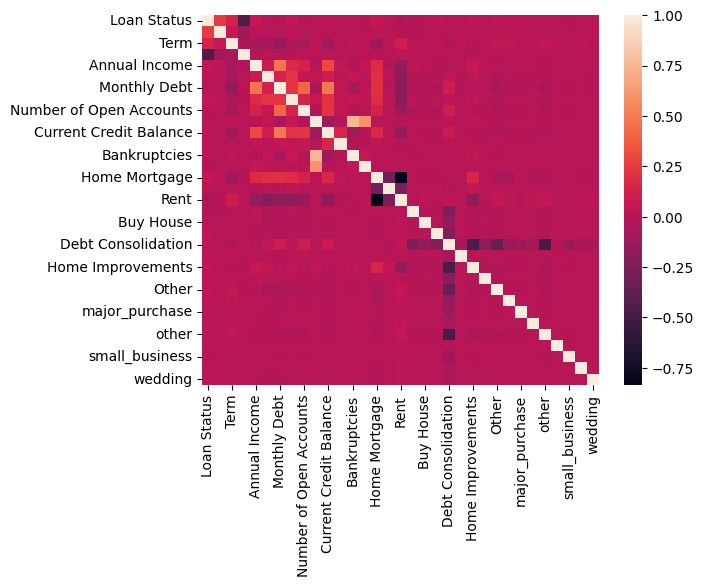

In [ ]:
import seaborn as sns
cor=train.corr()
sns.heatmap(cor)

In [ ]:
train['Loan Status'].value_counts()

1    67147
0    22639
Name: Loan Status, dtype: int64

In [37]:
temp=train
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
temp=scaler.fit_transform(temp)
temp.shape

(67490, 33)

In [39]:
temp=pd.DataFrame(temp)
temp.columns=train.columns

In [40]:
temp.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,...,Medical Bills,Other,Take a Trip,major_purchase,moving,other,renewable_energy,small_business,vacation,wedding
0,1.0,0.004301,1.0,0.017906,0.006592,0.777778,0.011965,0.202096,0.066667,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.000000,1.0,0.022527,0.013024,0.777778,0.066998,0.167665,0.226667,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.003323,0.0,0.019639,0.004413,0.222222,0.020057,0.124251,0.106667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.001912,1.0,0.968231,0.004957,1.000000,0.037554,0.203593,0.066667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.002023,1.0,0.020939,0.006693,0.000000,0.024906,0.238024,0.160000,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Loan ID 	Customer ID 	Loan Status 	Current Loan Amount 	Term 	Credit Score 	Annual Income 	
# Years in current job 	Home Ownership 	Purpose 	Monthly Debt 	Years of Credit History 	
# Months since last delinquent 	Number of Open Accounts 	Number of Credit Problems 	
# Current Credit Balance 	Maximum Open Credit 	Bankruptcies 	Tax Liens

In [43]:
from sklearn.metrics import classification_report

In [41]:
from sklearn.model_selection import train_test_split
x=temp.drop(columns=['Loan Status'],axis=1)
y=temp.loc[:,['Loan Status']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x,y)
y_pred=model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.28      1.00      0.44       913
         1.0       1.00      0.81      0.90     12585

    accuracy                           0.83     13498
   macro avg       0.64      0.91      0.67     13498
weighted avg       0.95      0.83      0.87     13498



In [47]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

<ipython-input-47-160bdb38d456>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


In [48]:
print('Random Forest')
print(classification_report(y_pred,y_test))

Random Forest
              precision    recall  f1-score   support

         0.0       0.31      0.92      0.46      1088
         1.0       0.99      0.82      0.90     12410

    accuracy                           0.83     13498
   macro avg       0.65      0.87      0.68     13498
weighted avg       0.94      0.83      0.86     13498



In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
model.score(x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.42459383431884723

In [61]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('Support Vector Machine')
print(classification_report(y_pred,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Machine
              precision    recall  f1-score   support

         0.0       0.28      0.99      0.44       929
         1.0       1.00      0.82      0.90     12569

    accuracy                           0.83     13498
   macro avg       0.64      0.90      0.67     13498
weighted avg       0.95      0.83      0.87     13498



In [65]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.823480 using {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.823436 (0.001791) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.823411 (0.001832) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.823431 (0.001773) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.823470 (0.001777) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.823480 (0.001886) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.823480 (0.001787) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.823441 (0.001866) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.823416 (0.001880) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.823450 (0.001874) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.823366 (0.001817) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.823366 (0.001817) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.823381 (0.001814) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.823381 (0.001866) with: {'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv=3
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.816714 using {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
0.734627 (0.007386) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.734627 (0.007386) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.771477 (0.005853) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.768247 (0.006408) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.788873 (0.004393) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.784561 (0.005046) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.799348 (0.005492) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.794962 (0.005257) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.804949 (0.002926) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.801911 (0.003537) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.809646 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [60]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('Gradient Boosting')
print(classification_report(y_pred,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.29      0.98      0.44       949
         1.0       1.00      0.82      0.90     12549

    accuracy                           0.83     13498
   macro avg       0.64      0.90      0.67     13498
weighted avg       0.95      0.83      0.87     13498



In [62]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('XGBoost')
print(classification_report(y_pred,y_test))

XGBoost
              precision    recall  f1-score   support

           0       0.32      0.85      0.47      1222
           1       0.98      0.82      0.89     12276

    accuracy                           0.82     13498
   macro avg       0.65      0.84      0.68     13498
weighted avg       0.92      0.82      0.86     13498



In [ ]:

estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
grid_search.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 10 folds for each of 96 candidates, totalling 960 fits


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv=3
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

NameError: ignored